In [ ]:
import tensorflow as tf
import os
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import glob

# German Traffic Sign Recognition
Multi-class, single-image classification

### Dataset
The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. They cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Their benchmark has the following properties:

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database

#### Notes
- For this project, we have reduced the number of images. There are around 16,500+ images in the dataset provided. You can check “label_details” folder for getting information about the classes.
- If the model is taking too much time to get trained then you can reduce the number of classes. There are around 43 classes in the dataset, model should be trained on a minimum of 15 classes.

### Initialize ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!cp /content/drive/My*Drive/Data.rar /content/

In [ ]:
!mkdir data

In [ ]:
!unrar x Data.rar /content/data

In [ ]:
dir_path = '/content/data/Data - German Traffic Sign Recognition/Data - German Traffic Sign Recognition'

In [ ]:
os.listdir(dir_path)

['Meta', 'Train']

In [ ]:
#Assigning the path for train and test images

train_path = dir_path +'/Train'
test_path = dir_path + '/Meta'

In [ ]:
print(sorted(os.listdir(train_path)))

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38']


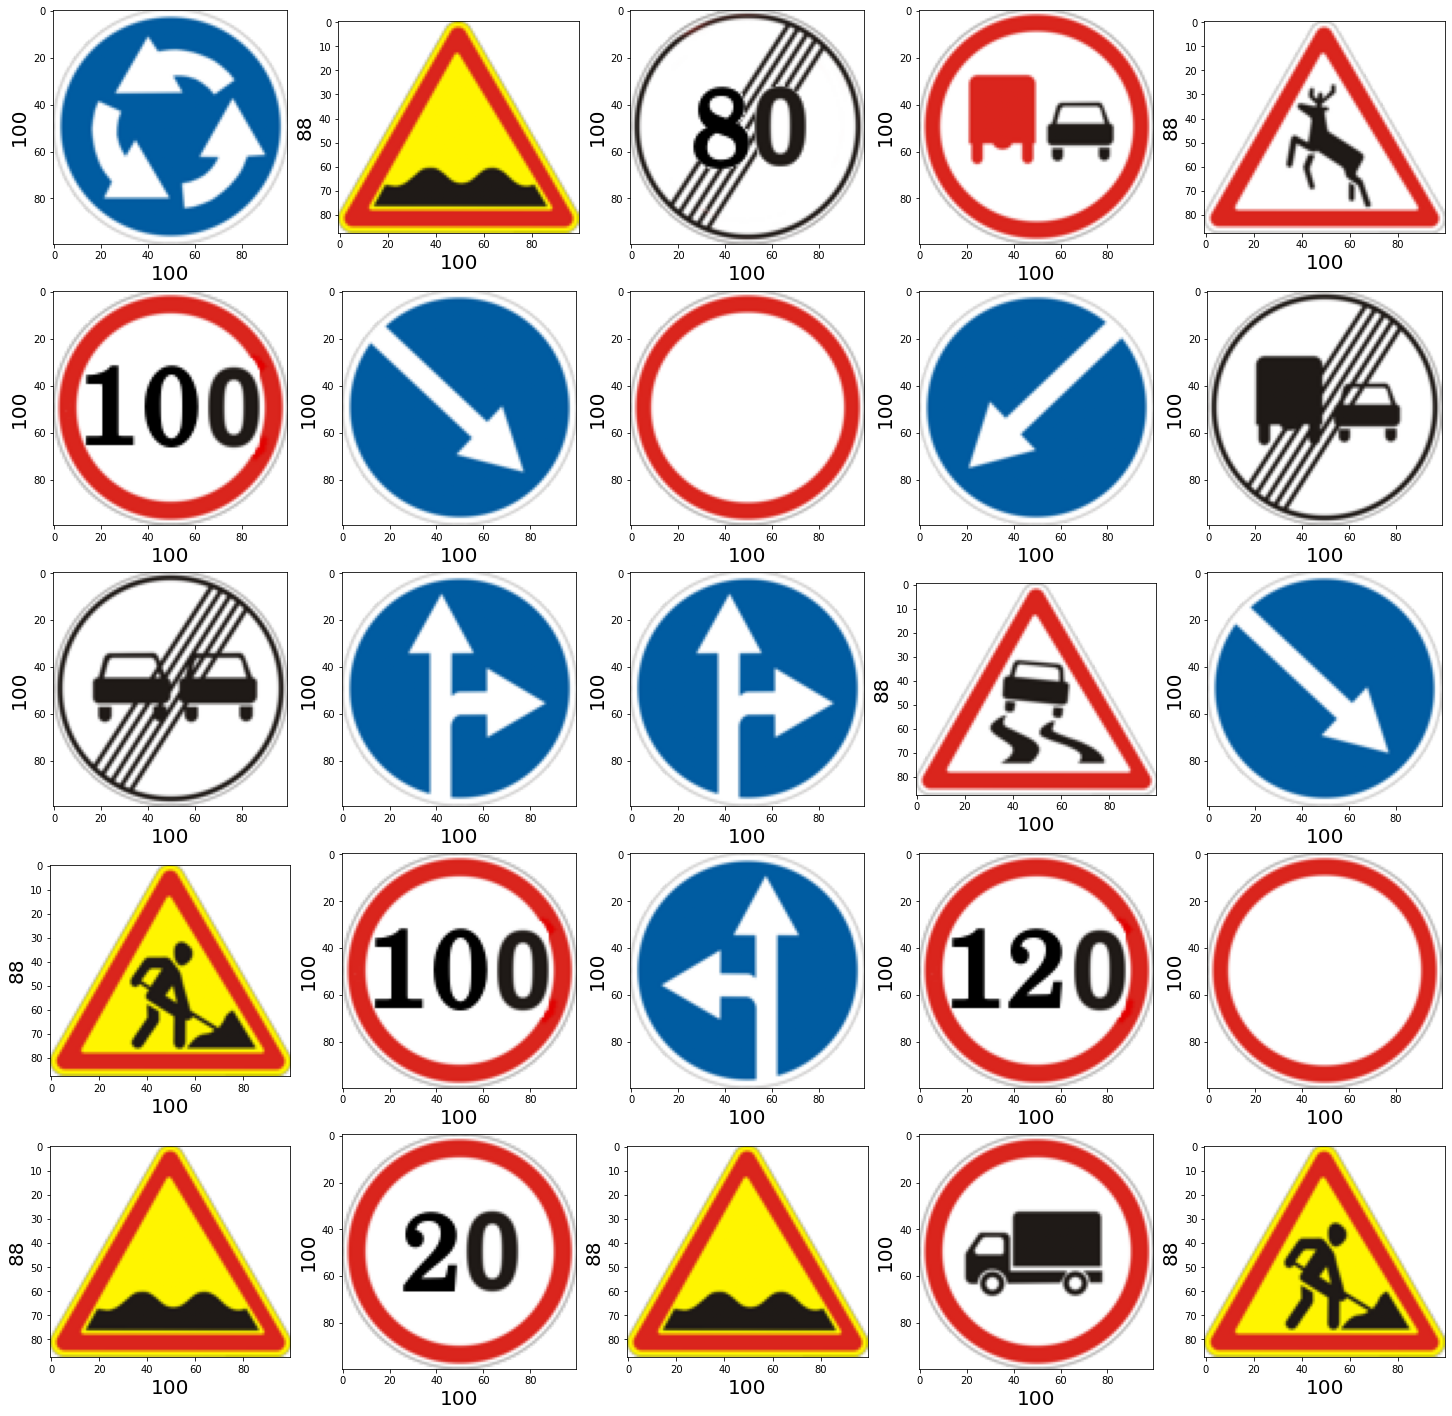

In [ ]:
import random
images_path = os.listdir(test_path)

plt.figure(figsize=(25,25))


for i in range(1,26):
    
    plt.subplot(5,5,i)
    random_img_path = test_path +'/'+ random.choice(images_path)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [ ]:
#Define some parameters
img_size = 50
image_shape = (50,50)
img_depth = 3


In [ ]:
#ImageDataGenerator declaration with 20% data as test (80% for training)
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True,
                                                              )

In [ ]:
Sign = list(os.walk(train_path))[0][1]
np.random.shuffle(Sign)

In [ ]:
# select how many classes to train on
nr_sign = 33

In [ ]:
idx_to_name = {i:x for (i,x) in enumerate(Sign[:nr_sign])}
name_to_idx = {x:i for (i,x) in enumerate(Sign[:nr_sign])}

In [ ]:
idx_to_name

{0: '19',
 1: '22',
 2: '1',
 3: '12',
 4: '13',
 5: '35',
 6: '18',
 7: '27',
 8: '10',
 9: '0',
 10: '31',
 11: '24',
 12: '17',
 13: '25',
 14: '29',
 15: '20',
 16: '15',
 17: '28',
 18: '3',
 19: '36',
 20: '16',
 21: '21',
 22: '37',
 23: '26',
 24: '32',
 25: '30',
 26: '23',
 27: '33',
 28: '11',
 29: '14',
 30: '34',
 31: '38',
 32: '2'}

In [ ]:
data = []
labels = []
img_size = (50,50)
path = '/content/data/Data - German Traffic Sign Recognition/Data - German Traffic Sign Recognition/Train/'
for Signs in idx_to_name.values():
    imgs = [cv2.resize(cv2.imread(img), img_size, interpolation=cv2.INTER_AREA) for img in glob.glob(path + Signs + '/*.png')]
    for img in imgs:
        labels.append(name_to_idx[Signs])
        data.append(img)
# Normalize data
data = np.array(data)
data = data / 255.0
data = data.astype('float32')

# Create one hot encoding for labels
labels = np.array(labels)
labels = np.eye(len(idx_to_name.keys()))[list(labels)]


In [ ]:
# check out the shapes
data.shape, labels.shape

((29488, 50, 50, 3), (29488, 33))

In [ ]:
# split training, labels
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(22116, 50, 50, 3)
(7372, 50, 50, 3)


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

### Define model


In [ ]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()

#normalize data
model.add(tf.keras.layers.BatchNormalization(input_shape=(50,50,3,)))


model.add(tf.keras.layers.Conv2D(64, (3, 3) , activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(rate=0.5))  

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(rate=0.5))  


  
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Dense(33, activation='softmax'))


### Compile the model 

In [ ]:
#Specify Loass and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Get model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 50, 50, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0

### Fit the model 


In [ ]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/Traffic.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [ ]:
history = model.fit(img_generator.flow(X_train, y_train, batch_size=32),
                    epochs=10,
                    verbose=1,
                    callbacks=model_checkpoint,
                    validation_data=(X_test,y_test))

Epoch 1/10
692/692 [==============================] - ETA: 0s - loss: 3.0347 - accuracy: 0.1486
Epoch 00001: val_accuracy improved from -inf to 0.30114, saving model to /content/drive/My Drive/Traffic.h5
692/692 [==============================] - 20s 28ms/step - loss: 3.0347 - accuracy: 0.1486 - val_loss: 2.5346 - val_accuracy: 0.3011
Epoch 2/10
691/692 [============================>.] - ETA: 0s - loss: 2.5095 - accuracy: 0.2622
Epoch 00002: val_accuracy improved from 0.30114 to 0.40939, saving model to /content/drive/My Drive/Traffic.h5
692/692 [==============================] - 20s 28ms/step - loss: 2.5088 - accuracy: 0.2622 - val_loss: 1.9780 - val_accuracy: 0.4094
Epoch 3/10
691/692 [============================>.] - ETA: 0s - loss: 2.1249 - accuracy: 0.3483
Epoch 00003: val_accuracy improved from 0.40939 to 0.46283, saving model to /content/drive/My Drive/Traffic.h5
692/692 [==============================] - 20s 29ms/step - loss: 2.1250 - accuracy: 0.3484 - val_loss: 1.6046 - val_

In [ ]:
history = model.fit(img_generator.flow(X_train, y_train, batch_size=32),
                    epochs=20,
                    initial_epoch=10,
                    verbose=1,
                    callbacks=model_checkpoint,
                    validation_data=(X_test,y_test))

Epoch 11/20
692/692 [==============================] - ETA: 0s - loss: 1.0487 - accuracy: 0.6505
Epoch 00011: val_accuracy improved from 0.78174 to 0.78852, saving model to /content/drive/My Drive/Traffic.h5
692/692 [==============================] - 19s 28ms/step - loss: 1.0487 - accuracy: 0.6505 - val_loss: 0.6201 - val_accuracy: 0.7885
Epoch 12/20
691/692 [============================>.] - ETA: 0s - loss: 0.9995 - accuracy: 0.6651
Epoch 00012: val_accuracy improved from 0.78852 to 0.80684, saving model to /content/drive/My Drive/Traffic.h5
692/692 [==============================] - 19s 28ms/step - loss: 0.9993 - accuracy: 0.6651 - val_loss: 0.5486 - val_accuracy: 0.8068
Epoch 13/20
692/692 [==============================] - ETA: 0s - loss: 0.9796 - accuracy: 0.6754
Epoch 00013: val_accuracy improved from 0.80684 to 0.81077, saving model to /content/drive/My Drive/Traffic.h5
692/692 [==============================] - 20s 29ms/step - loss: 0.9796 - accuracy: 0.6754 - val_loss: 0.5507 

In [ ]:
history = model.fit(img_generator.flow(X_train, y_train, batch_size=32),
                    epochs=30,
                    initial_epoch=20,
                    verbose=1,
                    callbacks=model_checkpoint,
                    validation_data=(X_test,y_test))

Epoch 21/30
691/692 [============================>.] - ETA: 0s - loss: 0.8086 - accuracy: 0.7362
Epoch 00021: val_accuracy did not improve from 0.87208
692/692 [==============================] - 20s 28ms/step - loss: 0.8091 - accuracy: 0.7362 - val_loss: 0.3816 - val_accuracy: 0.8721
Epoch 22/30
691/692 [============================>.] - ETA: 0s - loss: 0.8025 - accuracy: 0.7386
Epoch 00022: val_accuracy improved from 0.87208 to 0.87480, saving model to /content/drive/My Drive/Traffic.h5
692/692 [==============================] - 20s 29ms/step - loss: 0.8025 - accuracy: 0.7386 - val_loss: 0.3795 - val_accuracy: 0.8748
Epoch 23/30
692/692 [==============================] - ETA: 0s - loss: 0.7817 - accuracy: 0.7447
Epoch 00023: val_accuracy improved from 0.87480 to 0.88673, saving model to /content/drive/My Drive/Traffic.h5
692/692 [==============================] - 20s 29ms/step - loss: 0.7817 - accuracy: 0.7447 - val_loss: 0.3506 - val_accuracy: 0.8867
Epoch 24/30
692/692 [============

### Draw plots 

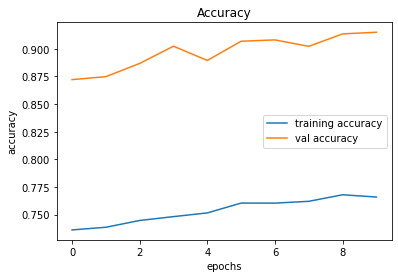

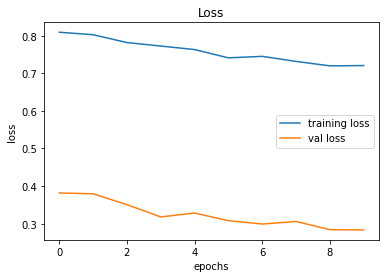

In [ ]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

 Got 91.5% accuracy with image generator

# Lets try without using image data generator

In [ ]:
history1 = model.fit(X_train, y_train, batch_size=32,
                    epochs=30,
                    verbose=1,
                    callbacks=model_checkpoint,
                    validation_data=(X_test,y_test))

Epoch 1/30
689/692 [============================>.] - ETA: 0s - loss: 2.4923 - accuracy: 0.2949
Epoch 00001: val_accuracy did not improve from 0.97992
692/692 [==============================] - 5s 7ms/step - loss: 2.4901 - accuracy: 0.2953 - val_loss: 1.5679 - val_accuracy: 0.5613
Epoch 2/30
687/692 [============================>.] - ETA: 0s - loss: 1.4555 - accuracy: 0.5360
Epoch 00002: val_accuracy did not improve from 0.97992
692/692 [==============================] - 5s 7ms/step - loss: 1.4526 - accuracy: 0.5369 - val_loss: 0.9067 - val_accuracy: 0.7595
Epoch 3/30
684/692 [============================>.] - ETA: 0s - loss: 0.9909 - accuracy: 0.6772
Epoch 00003: val_accuracy did not improve from 0.97992
692/692 [==============================] - 5s 7ms/step - loss: 0.9888 - accuracy: 0.6777 - val_loss: 0.4741 - val_accuracy: 0.8843
Epoch 4/30
689/692 [============================>.] - ETA: 0s - loss: 0.6897 - accuracy: 0.7769
Epoch 00004: val_accuracy did not improve from 0.97992
692

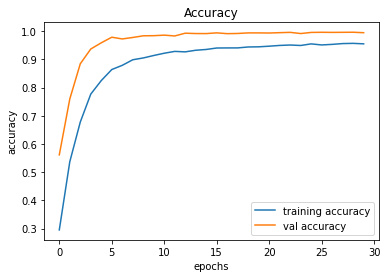

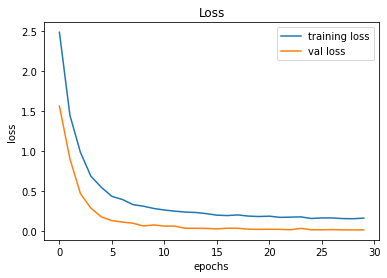

In [ ]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history1.history['accuracy'], label='training accuracy')
plt.plot(history1.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history1.history['loss'], label='training loss')
plt.plot(history1.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

# Getting 99.4% accuracy without using Image Data Generator